In [11]:
#coding:utf-8
import pymysql
import os
import csv
import pandas as pd
import matplotlib
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize


In [12]:
db = pymysql.connect("localhost", "root", "87869973lhy", "douban_bk", charset='utf8' )
# 使用cursor()方法获取操作游标 
cursor = db.cursor()
# 使用execute方法执行SQL语句
cursor.execute("SELECT * FROM internet_bk")
result = cursor.fetchall()
db.close()

in_columns = ['姓名','作者','ID','链接','打分人数','分数']
df=DataFrame(list(result),columns=in_columns)
df.head()

,姓名,作者,ID,链接,打分人数,分数
0,浪潮之巅,吴军,6709783,https://book.douban.com/subject/6709783/,22691,9.1
1,史蒂夫·乔布斯传,[美]沃尔特·艾萨克森,6798611,https://book.douban.com/subject/6798611/,38939,8.7
2,从0到1:开启商业与未来的秘密,彼得·蒂尔、布莱克·马斯特斯,6297606,https://book.douban.com/subject/26297606/,21692,7.6
3,腾讯传:中国互联网公司进化论,吴晓波,6929955,https://book.douban.com/subject/26929955/,11988,7.8
4,幕后产品:打造突破式产品思维,王诗沐,3396395,https://book.douban.com/subject/33396395/,474,8.5


In [13]:
df.columns

Index(['姓名', '作者', 'ID', '链接', '打分人数', '分数'], dtype='object')

In [14]:
# 打分人数top10
top10 = df.sort_values(by='打分人数',ascending=False)[:10]
top10

,姓名,作者,ID,链接,打分人数,分数
1,史蒂夫·乔布斯传,[美]沃尔特·艾萨克森,6798611,https://book.douban.com/subject/6798611/,38939,8.7
704,影响力,[美]罗伯特·西奥迪尼,1786387,https://book.douban.com/subject/1786387/,33365,8.6
70,世界因你不同:李开复自传,李开复、范海涛,4010196,https://book.douban.com/subject/4010196/,24547,8.1
0,浪潮之巅,吴军,6709783,https://book.douban.com/subject/6709783/,22691,9.1
2,从0到1:开启商业与未来的秘密,彼得·蒂尔、布莱克·马斯特斯,6297606,https://book.douban.com/subject/26297606/,21692,7.6
9,黑客与画家:硅谷创业之父PaulGraham文集,[美]PaulGraham,6021440,https://book.douban.com/subject/6021440/,16723,8.7
21,大数据时代:生活、工作与思维的大变革,[英]维克托•迈尔•舍恩伯格（ViktorMayer-Schönberger）,429677,https://book.douban.com/subject/20429677/,15450,7.5
478,原则,[美]瑞·达利欧,7608239,https://book.douban.com/subject/27608239/,14751,8.4
8,失控:全人类的最终命运和结局,[美]凯文·凯利,5375620,https://book.douban.com/subject/5375620/,14263,8.7
79,世界是平的:21世纪简史,[美]托马斯·弗里德曼,1867642,https://book.douban.com/subject/1867642/,13866,7.6


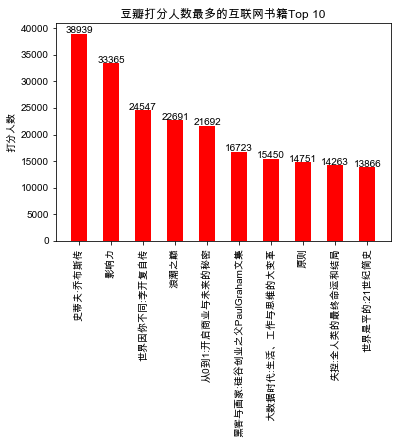

In [15]:
fig = plt.subplots(1,1)
data = Series(top10['打分人数'],index=top10['姓名'])
plt.bar(top10['姓名'],top10['打分人数'],width=0.5,color='r')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.xticks(top10['姓名'], top10['姓名'], rotation=90)
#plt.figure(figsize=(28, 12), dpi=160)
#plt.xlabel('书名')
plt.ylabel('打分人数')
plt.title('豆瓣打分人数最多的互联网书籍Top 10')
for x,y in enumerate(top10['打分人数']):
    plt.text(x,y+100,'%s' %round(y,1),ha='center')

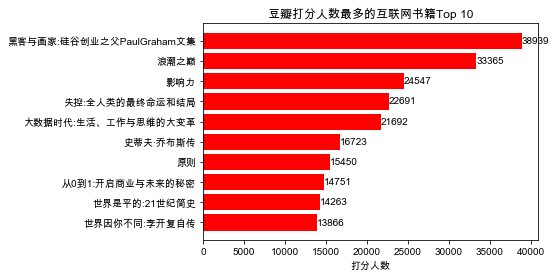

In [16]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#数据
name=top10['姓名']
colleges=top10['打分人数']
colleges = colleges.sort_values(ascending=True)
name = name.sort_values(ascending=True)
#图像绘制
fig,ax=plt.subplots()
b=ax.barh(range(len(name)),colleges,color='r')

#添加数据标签
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%d'%int(w),ha='left',va='center')

#设置Y轴刻度线标签
ax.set_yticks(range(len(name)))
ax.set_yticklabels(name)
plt.xlabel('打分人数')
plt.title('豆瓣打分人数最多的互联网书籍Top 10')
plt.show()


In [17]:
#评分人数大于100且分数最高的互联网书籍Top 10
over500 = df.loc[df['打分人数']>500]
res_over500 = over500.sort_values(by='分数',ascending=True)[-10:]
res_over500

,姓名,作者,ID,链接,打分人数,分数
220,浪潮之巅（上册）,吴军,4739213,https://book.douban.com/subject/24739213/,755,9.1
36,Python编程:从入门到实践,[美]埃里克·马瑟斯,6829016,https://book.douban.com/subject/26829016/,1951,9.1
10,硅谷增长黑客实战笔记,曲卉,186119,https://book.douban.com/subject/30186119/,724,9.1
241,"GettingReal:TheSmarter,Faster,EasierWaytoBuild...",JasonFried、HeinemeierDavidHansson、MatthewLinde...,3567853,https://book.douban.com/subject/3567853/,937,9.1
0,浪潮之巅,吴军,6709783,https://book.douban.com/subject/6709783/,22691,9.1
105,浪潮之巅（第2版）（套装上下册）,吴军,4738302,https://book.douban.com/subject/24738302/,2974,9.2
62,网络是怎样连接的,[日]户根勤,6941639,https://book.douban.com/subject/26941639/,680,9.2
340,浪潮之巅（下册）,吴军,4740308,https://book.douban.com/subject/24740308/,528,9.2
612,TCP/IP详解卷1：协议,W.RichardStevens,1088054,https://book.douban.com/subject/1088054/,2045,9.2
16,浪潮之巅（第三版）（上下册）,吴军,6792439,https://book.douban.com/subject/26792439/,1206,9.3


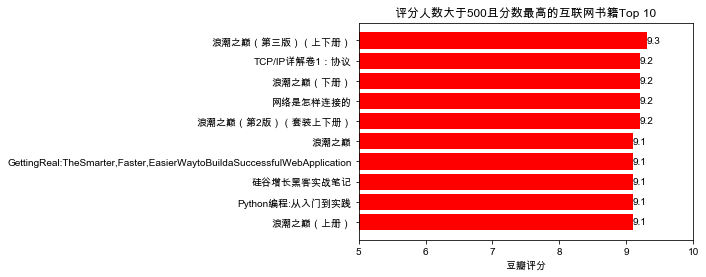

In [18]:
#数据
name=res_over500['姓名']
colleges=res_over500['分数']

#图像绘制
fig,ax=plt.subplots()
b=ax.barh(range(len(name)),colleges,color='r')

#添加数据标签
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%.1f'%w,ha='left',va='center')
plt.xlim(5, 10)
#设置Y轴刻度线标签
ax.set_yticks(range(len(name)))
ax.set_yticklabels(name)
plt.xlabel('豆瓣评分')
plt.title('评分人数大于500且分数最高的互联网书籍Top 10')
plt.show()

In [19]:
#评分人数小于500且分数最高的互联网书籍Top10
small500 = df.loc[df['打分人数']<500]
small500_2 = small500.loc[small500['打分人数']>100]
res_small500 = small500_2.sort_values('分数',ascending=True)[-10:]
res_small500

,姓名,作者,ID,链接,打分人数,分数
821,码农翻身,刘欣,231515,https://book.douban.com/subject/30231515/,373,9.0
858,文明之光,吴军,6839342,https://book.douban.com/subject/26839342/,385,9.0
73,信息规则:网络经济的策略指导,[美]卡尔・夏皮罗(CarlShapiro)、[美]哈尔・瓦里安(HalVarian),1011731,https://book.douban.com/subject/1011731/,306,9.0
495,DesigningInteractions,BillMoggridge,1894206,https://book.douban.com/subject/1894206/,499,9.0
384,全景探秘游戏设计艺术,JesseSchell,4837351,https://book.douban.com/subject/4837351/,429,9.0
338,"OutofControl:TheNewBiologyofMachines,SocialSys...",KevinKelly,1483021,https://book.douban.com/subject/1483021/,262,9.1
471,信息检索导论,ChristopherD.Manning、HinrichSchütze、PrabhakarR...,5252170,https://book.douban.com/subject/5252170/,249,9.1
236,信息论基础:（原书第2版）,[美]ThomasM.Cove,2305237,https://book.douban.com/subject/2305237/,123,9.1
798,UNIX网络编程卷1：套接字联网API（第3版）:卷1：套接字联网API,W.RichardStevens、BillFenner、AndrewM.Rudoff,4859464,https://book.douban.com/subject/4859464/,344,9.3
312,掘金大数据:电信数据金矿详解、挖掘及应用,程新洲、朱常波、晁昆,405895,https://book.douban.com/subject/30405895/,286,9.5


In [20]:
#数据
name=res_small500['姓名']
colleges=res_small500['分数']


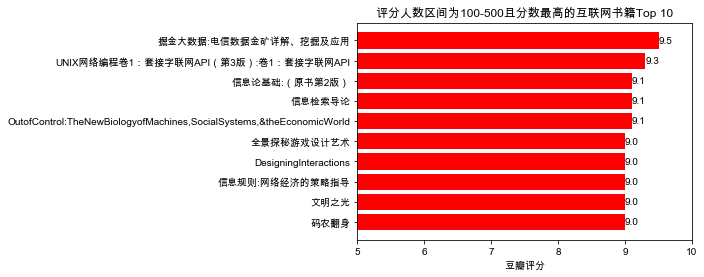

In [21]:
#图像绘制
fig,ax=plt.subplots()
b=ax.barh(range(len(name)),colleges,color='r')

#添加数据标签
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%.1f'%w,ha='left',va='center')
plt.xlim(5, 10)
#设置Y轴刻度线标签
ax.set_yticks(range(len(name)))
ax.set_yticklabels(name)
plt.xlabel('豆瓣评分')
plt.title('评分人数区间为100-500且分数最高的互联网书籍Top 10')
plt.show()

In [22]:
db = pymysql.connect("localhost", "root", "87869973lhy", "douban_bk", charset='utf8' )
# 使用cursor()方法获取操作游标 
cursor = db.cursor()
# 使用execute方法执行SQL语句
cursor.execute("SELECT * FROM auther_list")
result = cursor.fetchall()
db.close()

in_columns = ['作者','书籍数量']
df2=DataFrame(list(result),columns=in_columns)
df2[:10]

,作者,书籍数量
0,吴军,15
1,黄若,6
2,王坚,5
3,徐志斌,4
4,罗振宇,4
5,[美]凯文·凯利,4
6,周鸿祎,3
7,黄有璨,3
8,苏杰,3
9,[美]克里斯·安德森,3


In [27]:
author_top10 = df2[:10]
author_top10_2 = author_top10.sort_values(by='书籍数量',ascending=True)
author_top10_2

,作者,书籍数量
6,周鸿祎,3
7,黄有璨,3
8,苏杰,3
9,[美]克里斯·安德森,3
3,徐志斌,4
4,罗振宇,4
5,[美]凯文·凯利,4
2,王坚,5
1,黄若,6
0,吴军,15


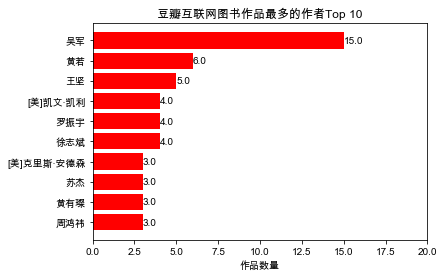

In [29]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#数据
name=author_top10_2['作者']
bk_num=author_top10_2['书籍数量']

#图像绘制
fig,ax=plt.subplots()
b=ax.barh(range(len(name)),bk_num,color='r')

#添加数据标签
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%.1f'%w,ha='left',va='center')
plt.xlim(0, 20)
#设置Y轴刻度线标签
ax.set_yticks(range(len(name)))
ax.set_yticklabels(name)
plt.xlabel('作品数量')
plt.title('豆瓣互联网图书作品最多的作者Top 10')
plt.show()